# The problem: An organ donor must send an organ urgently from BWI airport (Baltimore) to a New York Airport on a Monday so the patient who will receive that organ can have his surgery done that same day with the least delay as possible. To do this the organ can be shipped though OH carrier that reaches JFK airport, or alternatively use RU carrier that reaches Newark airport. We must decide by reducing the chances of fligt delays of each option.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

In [11]:
delays_df = pd.read_csv('FlightDelays.csv')

In [81]:
delays_df.head(8)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01/01/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01/01/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01/01/2004,7810,IAD,0,4,1,N301UE,ontime


In [82]:
# Replacing spacing with underscore in all column headers
delays_df.columns = [s.strip().replace(' ','_') for s in delays_df.columns]

In [83]:
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
# Keeping only records with BWI as origin airport
delays_df = delays_df.drop(delays_df[(delays_df.ORIGIN != 'BWI')].index)

In [84]:
delays_df.shape

(145, 13)

In [85]:
delays_df.head(2)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
32,1455,RU,1452,EWR,169,01/01/2004,2403,BWI,0,4,1,N14916,ontime


In [86]:
df1 = pd.get_dummies(delays_df['Flight_Status'])
# delays_df = pd.get_dummies(delays_df['Flight_Status'])

In [89]:
df1

,delayed,ontime
0,0,1
32,0,1
33,0,1
34,0,1
35,0,1
...,...,...
2151,0,1
2184,0,1
2185,0,1
2186,0,1


In [90]:
delays_df['delayed'] = df1.delayed 

In [92]:
delays_df['ontime'] = df1.ontime

In [100]:
delays_df.head(15)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status,delayed,ontime
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,0,1
32,1455,RU,1452,EWR,169,01/01/2004,2403,BWI,0,4,1,N14916,ontime,0,1
33,1720,RU,1710,EWR,169,01/01/2004,2675,BWI,0,4,1,N16954,ontime,0,1
34,1030,RU,1030,EWR,169,01/01/2004,2303,BWI,0,4,1,N26549,ontime,0,1
35,700,RU,656,EWR,169,01/01/2004,2703,BWI,0,4,1,N16954,ontime,0,1
50,1455,OH,1455,JFK,184,01/02/2004,5935,BWI,0,5,2,N995CA,ontime,0,1
88,1720,RU,1715,EWR,169,01/02/2004,2675,BWI,0,5,2,N19966,ontime,0,1
89,1030,RU,1030,EWR,169,01/02/2004,2303,BWI,0,5,2,N12540,ontime,0,1
90,700,RU,656,EWR,169,01/02/2004,2703,BWI,0,5,2,N16961,ontime,0,1
91,1455,RU,1456,EWR,169,01/02/2004,2403,BWI,0,5,2,N12946,ontime,0,1


<AxesSubplot:xlabel='DEP_TIME', ylabel='DEST'>

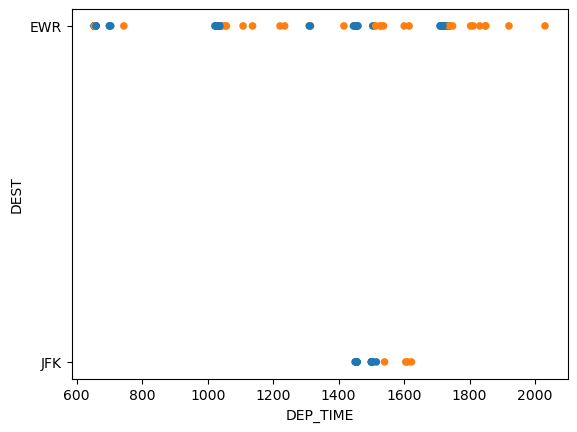

In [94]:
# Scatterplot
delays_df.plot.scatter(x='DEP_TIME', y='DEST', c=['C0' if c == 'ontime' else 'C1' for c in delays_df.Flight_Status])
# We can clearly observe the departure time frames towards each ariport and notice that they both have delays in the data set. 

<AxesSubplot:>

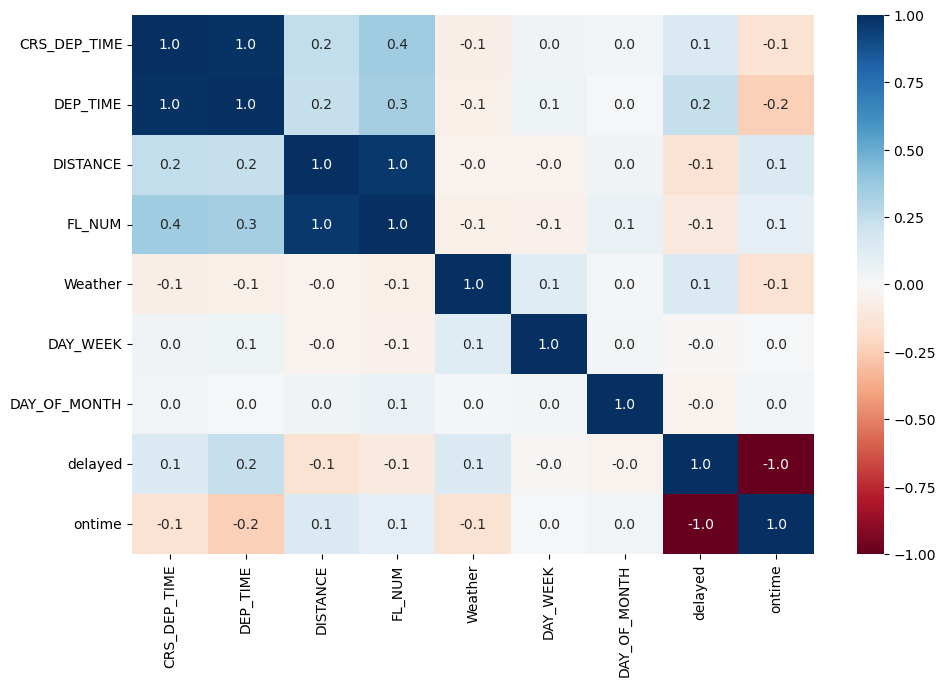

In [95]:
import seaborn as sns
corr = delays_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
# CRS_DEP_TIME and DEP_TIME are highly correlated.
# DISTANCE and FL_NUM are highly correlated.

Text(0.5, 0.98, 'Flight Frequency by Hour')

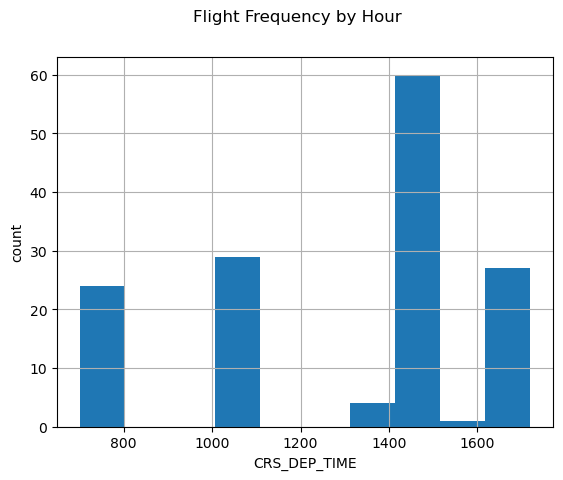

In [96]:
#Pandas version - Histrogam Distribution
ax = delays_df.CRS_DEP_TIME.hist()
ax.set_xlabel('CRS_DEP_TIME'); ax.set_ylabel('count');
plt.suptitle('Flight Frequency by Hour')

Text(0.5, 0.98, 'Flights per month from BWI to New York airports')

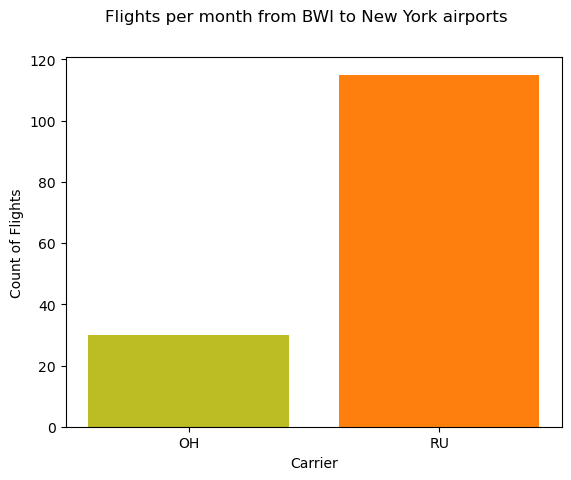

In [106]:
#Matplot version - bar chart
dataForPlot = delays_df.groupby('CARRIER').count().Flight_Status
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C8','C1'])
ax.set_xlabel('Carrier')
ax.set_ylabel('Count of Flights')
plt.suptitle('Flights per month from BWI to New York airports')

Text(0.5, 0.98, 'Average delays from BWI to New York airports per Carrier')

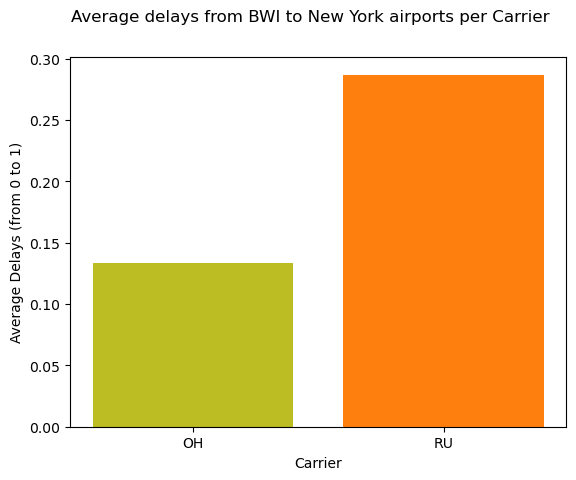

In [110]:
#Matplot version - bar chart
dataForPlot = delays_df.groupby('CARRIER').mean().delayed
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C8','C1'])
ax.set_xlabel('Carrier')
ax.set_ylabel('Average Delays (from 0 to 1)')
plt.suptitle('Average delays from BWI to New York airports per Carrier')

Text(0.5, 0.98, 'Average delays from BWI to New York airports')

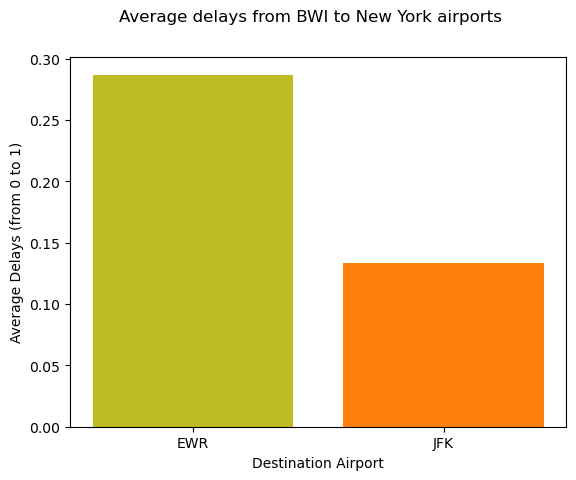

In [109]:
#Matplot version - bar chart
dataForPlot = delays_df.groupby('DEST').mean().delayed
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C8','C1'])
ax.set_xlabel('Destination Airport')
ax.set_ylabel('Average Delays (from 0 to 1)')
plt.suptitle('Average delays from BWI to New York airports')

In [111]:
delays_df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,delayed,ontime
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1291.551724,1309.441379,172.103448,3333.344828,0.006897,4.179310,15.710345,0.255172,0.744828
std,344.016067,369.794479,6.097272,1380.654582,0.083045,1.913653,8.892035,0.437469,0.437469
min,700.000000,653.000000,169.000000,2229.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1030.000000,1030.000000,169.000000,2403.000000,0.000000,3.000000,8.000000,0.000000,0.000000
50%,1455.000000,1452.000000,169.000000,2703.000000,0.000000,4.000000,16.000000,0.000000,1.000000
75%,1455.000000,1527.000000,169.000000,3372.000000,0.000000,6.000000,23.000000,1.000000,1.000000
max,1720.000000,2030.000000,184.000000,5935.000000,1.000000,7.000000,31.000000,1.000000,1.000000


In [125]:
print('The Mean of delayed flights from BWI to New York airports is: ', str(round(delays_df.delayed.mean(),2)*100) + '%')

print('The number of missing values: ', delays_df.isnull().sum())

The Mean of delayed flights from BWI to New York airports is:  26.0%
The number of missing values:  CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight_Status    0
delayed          0
ontime           0
dtype: int64


In [126]:
delays_df.groupby(['DEST', 'CARRIER'])['delayed'].mean()
# We can see that RU flies ontly to Newark and OH flies only to JFK. 
# We can see that RU has a bigger average delay rate.

DEST  CARRIER
EWR   RU         0.286957
JFK   OH         0.133333
Name: delayed, dtype: float64

# Naives Bayes Classifier

In [139]:
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

In [140]:
#Split the data into training (60%) and testing (40%)
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'DEST', 'CARRIER']
outcome = 'Flight_Status'

In [141]:
X = pd.get_dummies(delays_df[predictors])
y = delays_df['Flight_Status']
classes = ['ontime', 'delayed']

In [147]:
X.head(5)

,CRS_DEP_TIME,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,DEST_EWR,DEST_JFK,CARRIER_OH,CARRIER_RU
0,1455,0,0,0,1,0,0,0,0,1,1,0
32,1455,0,0,0,1,0,0,0,1,0,0,1
33,1720,0,0,0,1,0,0,0,1,0,0,1
34,1030,0,0,0,1,0,0,0,1,0,0,1
35,700,0,0,0,1,0,0,0,1,0,0,1


In [143]:
# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

In [144]:
# run naive Bayes
delays_nb = MultinomialNB(alpha=1)
delays_nb.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [145]:
# predict probabilities (Shows the belonging probabilities of each record to which class)
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

In [146]:
# predict class membership (shows the class instead of probability by selecting the class with 
# highest probability)
y_train_pred = delays_nb.predict(X_train)
y_valid_pred = delays_nb.predict(X_valid)

In [218]:
# Use the model to predict a new data
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred})], axis=1)
mask = ((X_valid.CARRIER_OH == 1) & (X_valid.DAY_WEEK_1 == 1)) 

In [219]:
print(df[mask])

       actual predicted
759    ontime    ontime
226   delayed    ontime
1800   ontime    ontime


In [220]:
# Use the model to predict a new data
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred})], axis=1)
mask2 = ((X_valid.CARRIER_RU == 1) & (X_valid.DAY_WEEK_1 == 1)) 

In [221]:
print(df[mask2])

      actual predicted
818   ontime   delayed
1323  ontime   delayed
1848  ontime   delayed
1324  ontime   delayed


In [222]:
# According to the predictions, the OH carrier flight on Mondays towards JFK is predicted to be ontime. On the other hand
# the RU carrier flight on Mondays to EWR is predicted to by delayed.
# Therefore, on a Monday it would be better to use the OH carrier towards JFK, instead of the RU carrier that
# that flies to EWR. 
# It's important to notice that it's strange to see that RU carrier to EWR is predicted to be delayed when all 4 flights
# were actually ontime. This happens because in the training models, most of the flights covering this route by this airline
# were actually delayed. We can observe this in the steps below. 


In [223]:
# Understainding the training data to explain the strange results from the above ahead. To do this we will run the training data
# instead of the valid data.
df = pd.concat([pd.DataFrame({'actual': y_train, 'predicted': y_train_pred})], axis=1)
mask3 = ((X_train.CARRIER_RU == 1) & (X_train.DAY_WEEK_1 == 1)) 

In [217]:
print(df[mask3])

       actual predicted
820    ontime   delayed
1847  delayed   delayed
819   delayed   delayed
1321   ontime   delayed
283   delayed   delayed
1322   ontime   delayed
821    ontime   delayed
284   delayed   delayed
282   delayed   delayed


# K-NN

In [ ]:
#Now we analyse the flights from BWI to JFK and EWR through the carriers OH and RU on Monday. firstly we look for the flight OH on monday.

In [18]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
import matplotlib.pylab as plt

In [19]:
delays_df = pd.read_excel("Flightdelays_1.xlsx")

In [20]:
# Adding index and presenting the first 16 data records.
delays_df['Number'] = delays_df.index + 1
delays_df.head(16)

,CARRIER,DEP_TIME,DAY_WEEK,DAY_OF_MONTH,Flight Status,Number
0,OH,1610,1,5,delayed,1
1,RU,744,1,5,delayed,2
2,RU,1527,1,5,delayed,3
3,RU,1221,1,5,delayed,4
4,OH,1450,1,12,ontime,5
5,RU,656,1,12,ontime,6
6,RU,1509,1,12,delayed,7
7,RU,1720,1,12,ontime,8
8,RU,1040,1,12,ontime,9
9,OH,1455,1,19,ontime,10


In [5]:
# Rename the column DAY_WEEK to DAY_OF_WEEK for better understanding of the variable.
delays_df.rename(columns = {'DAY_WEEK':'DAY_OF_WEEK'}, inplace = True)

In [6]:
delays_df = pd.get_dummies(delays_df, columns=['CARRIER'])

In [7]:
delays_df

,DEP_TIME,DAY_OF_WEEK,DAY_OF_MONTH,Flight Status,Number,CARRIER_OH,CARRIER_RU
0,1610,1,5,delayed,1,1,0
1,744,1,5,delayed,2,0,1
2,1527,1,5,delayed,3,0,1
3,1221,1,5,delayed,4,0,1
4,1450,1,12,ontime,5,1,0
5,656,1,12,ontime,6,0,1
6,1509,1,12,delayed,7,0,1
7,1720,1,12,ontime,8,0,1
8,1040,1,12,ontime,9,0,1
9,1455,1,19,ontime,10,1,0


In [8]:
#Splitting the data into training (60%) and validation(40%) sets.
trainData, validData = train_test_split(delays_df,test_size=0.4, random_state=24)
print(trainData.shape, validData.shape)

(10, 7) (7, 7)


In [31]:
#Considering a new flight of OH on Monday departing from BWI to JFK on 10th at 1540 hours.
newflight = pd.DataFrame([{'CARRIER_OH':1, 'DEP_TIME': 1540, 'DAY_OF_WEEK':1, 'DAY_OF_MONTH':10}])
newflight

,CARRIER_OH,DEP_TIME,DAY_OF_WEEK,DAY_OF_MONTH
0,1,1540,1,10


In [32]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['CARRIER_OH','DEP_TIME', 'DAY_OF_WEEK','DAY_OF_MONTH']])

StandardScaler()

In [33]:
#Transforming the entire dataset by normalizing.
delaysNorm = pd.concat([pd.DataFrame(scaler.transform(delays_df[['CARRIER_OH','DEP_TIME', 'DAY_OF_WEEK','DAY_OF_MONTH']]),columns=['ZCARRIER_OH','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']),delays_df[['Flight Status', 'Number']]], axis=1)
trainNorm = delaysNorm.iloc[trainData.index]
validNorm = delaysNorm.iloc[validData.index]
newflightNorm = pd.DataFrame(scaler.transform(newflight), columns=['ZCARRIER_OH','ZDEP_TIME','ZDAY_OF_WEEK','ZDAY_OF_MONTH'])

In [34]:
# Use k nearest neighbor against the normalized training data with K=3
knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm[['ZCARRIER_OH','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']])
distances, indices = knn.kneighbors(newflightNorm)
print(trainNorm.iloc[indices[0], :])

   ZCARRIER_OH  ZDEP_TIME  ZDAY_OF_WEEK  ZDAY_OF_MONTH Flight Status  Number
4     1.527525   0.473808           0.0       0.000000        ontime       5
0     1.527525   0.936060           0.0      -1.118034       delayed       1
9     1.527525   0.488253           0.0       1.118034        ontime      10


In [35]:
train_X = trainNorm[['ZCARRIER_OH','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']]
train_y = trainNorm['Flight Status']
valid_X = validNorm[['ZCARRIER_OH','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']]
valid_y = validNorm['Flight Status']

In [36]:
# Train the classifier for different values of k
results = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({'k': k,'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
                   })
results = pd.DataFrame(results)
print(results)

    k  accuracy
0   1  0.714286
1   2  0.571429
2   3  0.571429
3   4  0.571429
4   5  0.714286
5   6  0.428571
6   7  0.714286
7   8  0.714286
8   9  0.714286
9  10  0.714286


C:\Users\anjan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anjan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [37]:
# Retrain with full dataset
delays_X = delaysNorm[['ZCARRIER_OH','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']]
delays_y = delaysNorm['Flight Status']
knn = KNeighborsClassifier(n_neighbors=5).fit(delays_X, delays_y)
distances, indices = knn.kneighbors(newflightNorm)
print(knn.predict(newflightNorm))
print('Distances',distances)
print('Indices', indices)
print(delaysNorm.iloc[indices[0], :])

['ontime']
Distances [[0.41188523 0.82380468 1.45829755 2.20725322 2.26591705]]
Indices [[4 0 9 6 7]]
   ZCARRIER_OH  ZDEP_TIME  ZDAY_OF_WEEK  ZDAY_OF_MONTH Flight Status  Number
4     1.527525   0.473808           0.0       0.000000        ontime       5
0     1.527525   0.936060           0.0      -1.118034       delayed       1
9     1.527525   0.488253           0.0       1.118034        ontime      10
6    -0.654654   0.644263           0.0       0.000000       delayed       7
7    -0.654654   1.253858           0.0       0.000000        ontime       8


C:\Users\anjan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [9]:
# Now we take the RU carrier and predicting whether it will be ontime or delayed on the same day and same time.
newflight = pd.DataFrame([{'CARRIER_RU':1, 'DEP_TIME': 1540, 'DAY_OF_WEEK':1, 'DAY_OF_MONTH':10}])
newflight

,CARRIER_RU,DEP_TIME,DAY_OF_WEEK,DAY_OF_MONTH
0,1,1540,1,10


In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['CARRIER_RU','DEP_TIME', 'DAY_OF_WEEK','DAY_OF_MONTH']])

StandardScaler()

In [11]:
#Transform the full dataset by normalizing.
delaysNorm = pd.concat([pd.DataFrame(scaler.transform(delays_df[['CARRIER_RU','DEP_TIME', 'DAY_OF_WEEK','DAY_OF_MONTH']]),columns=['ZCARRIER_RU','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']),delays_df[['Flight Status', 'Number']]], axis=1)
trainNorm = delaysNorm.iloc[trainData.index]
validNorm = delaysNorm.iloc[validData.index]
newflightNorm = pd.DataFrame(scaler.transform(newflight), columns=['ZCARRIER_RU','ZDEP_TIME','ZDAY_OF_WEEK','ZDAY_OF_MONTH'])

In [12]:
##Use k nearest neighbor against the normalized training data with K=3
knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm[['ZCARRIER_RU','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']])
distances, indices = knn.kneighbors(newflightNorm)
print(trainNorm.iloc[indices[0], :])

   ZCARRIER_RU  ZDEP_TIME  ZDAY_OF_WEEK  ZDAY_OF_MONTH Flight Status  Number
7     0.654654   1.253858           0.0       0.000000        ontime       8
2     0.654654   0.696267           0.0      -1.118034       delayed       3
3     0.654654  -0.187790           0.0      -1.118034       delayed       4


In [13]:
train_X = trainNorm[['ZCARRIER_RU','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']]
train_y = trainNorm['Flight Status']
valid_X = validNorm[['ZCARRIER_RU','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']]
valid_y = validNorm['Flight Status']

In [14]:
# Train the classifier for different values of k
results = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({'k': k,'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
                   })
results = pd.DataFrame(results)
print(results)

    k  accuracy
0   1  0.714286
1   2  0.571429
2   3  0.571429
3   4  0.571429
4   5  0.714286
5   6  0.428571
6   7  0.714286
7   8  0.714286
8   9  0.714286
9  10  0.714286


C:\Users\anjan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anjan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [15]:
# Retrain with full dataset
delays_X = delaysNorm[['ZCARRIER_RU','ZDEP_TIME', 'ZDAY_OF_WEEK','ZDAY_OF_MONTH']]
delays_y = delaysNorm['Flight Status']
knn = KNeighborsClassifier(n_neighbors=5).fit(delays_X, delays_y)
distances, indices = knn.kneighbors(newflightNorm)
print(knn.predict(newflightNorm))
print('Distances',distances)
print('Indices', indices)
print(delaysNorm.iloc[indices[0], :])

['delayed']
Distances [[0.33175599 0.61030756 0.79947839 1.21947862 1.46028802]]
Indices [[ 6  7  2  3 13]]
    ZCARRIER_RU  ZDEP_TIME  ZDAY_OF_WEEK  ZDAY_OF_MONTH Flight Status  Number
6      0.654654   0.644263           0.0       0.000000       delayed       7
7      0.654654   1.253858           0.0       0.000000        ontime       8
2      0.654654   0.696267           0.0      -1.118034       delayed       3
3      0.654654  -0.187790           0.0      -1.118034       delayed       4
13     0.654654   0.476697           0.0       1.118034        ontime      14


C:\Users\anjan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#Now we can conclude from KNN that it is better to take OH carrier from BWI TO JFK as it predicted to be ontime 
#while the RU carrier from BWI to EWR is predicted to be delayed on monday day 10 at 1540 hours.